In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as stats

In [3]:
# Set parameters
np.random.seed(1234)
survey_sample_size=908 
trump_true_p = 0.5
harris_true_p = 1-trump_true_p 

# obtain random survey results drawn from binomial distribution 
trump_votes_sample = np.random.binomial(survey_sample_size, trump_true_p)
trump_pct_sample = trump_votes_sample/survey_sample_size 
harris_pct_sample = (survey_sample_size-trump_votes_sample)/survey_sample_size

# print results
print("Trump Survey Votes: {:0}".format(trump_votes_sample))
print("Trump Survey Share: {:.3}".format(trump_pct_sample))
print("Harris Survey Share: {:.3}".format(harris_pct_sample))

Trump Survey Votes: 443
Trump Survey Share: 0.488
Harris Survey Share: 0.512


In [4]:
def gen_survey_data(survey_sample_size, trump_true_p, num_surveys):
    trump_votes = np.random.binomial(survey_sample_size, trump_true_p, size=num_surveys)
    trump_pct = trump_votes / survey_sample_size 
    harris_pct = 1 - trump_pct 
    trump_harris_gap = trump_pct - harris_pct 
    trump_error = trump_true_p - trump_pct 
    harris_error = harris_true_p - harris_pct 
    results_df = pd.DataFrame({'trump_pct':trump_pct, 'harris_pct':harris_pct, 'trump_harris_gap':trump_harris_gap,
                               'trump_error':trump_error, 'harris_error':harris_error})
    return(results_df)

num_surveys = 10
100*gen_survey_data(survey_sample_size, trump_true_p, num_surveys).round(3)

,trump_pct,harris_pct,trump_harris_gap,trump_error,harris_error
0,49.4,50.6,-1.1,0.6,-0.6
1,49.0,51.0,-2.0,1.0,-1.0
2,48.7,51.3,-2.6,1.3,-1.3
3,46.6,53.4,-6.8,3.4,-3.4
4,50.0,50.0,0.0,0.0,0.0
5,50.9,49.1,1.8,-0.9,0.9
6,49.9,50.1,-0.2,0.1,-0.1
7,52.4,47.6,4.8,-2.4,2.4
8,49.7,50.3,-0.7,0.3,-0.3
9,49.1,50.9,-1.8,0.9,-0.9


In [22]:
num_surveys = 10000
results=gen_survey_data(survey_sample_size, trump_true_p, num_surveys)

trump_error_p2_5 = results['trump_error'].quantile(0.025)
print("Trum error 2.5 percentile", trump_error_p2_5)

trump_error_p97_5 = results['trump_error'].quantile(0.975)
print("Trump error 97.5 percentile: ", trump_error_p97_5)

harris_error_p2_5 = results['harris_error'].quantile(0.025)
harris_error_p97_5 = results['harris_error'].quantile(0.975)

trump_harris_gap_p2_5 = results['trump_harris_gap'].quantile(0.025)
print("Trump-Harris gap 2.5 percentile: ", trump_harris_gap_p2_5)

trump_harris_gap_p97_5 = results['trump_harris_gap'].quantile(0.975)
print("Trump-Harris gap 97.5 percentile: ", trump_harris_gap_p97_5)


Trum error 2.5 percentile -0.033333333333333326
Trump error 97.5 percentile:  0.03222222222222221
Trump-Harris gap 2.5 percentile:  -0.06444444444444436
Trump-Harris gap 97.5 percentile:  0.06666666666666665


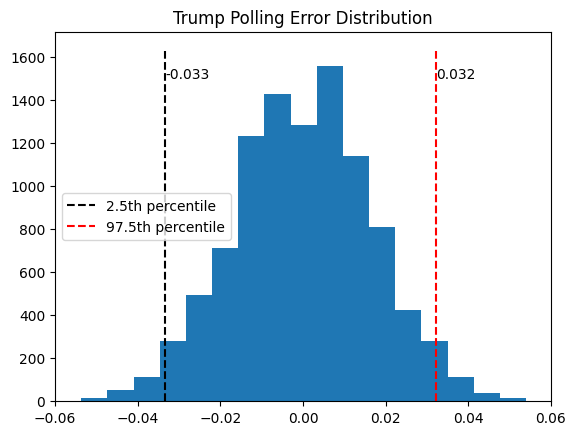

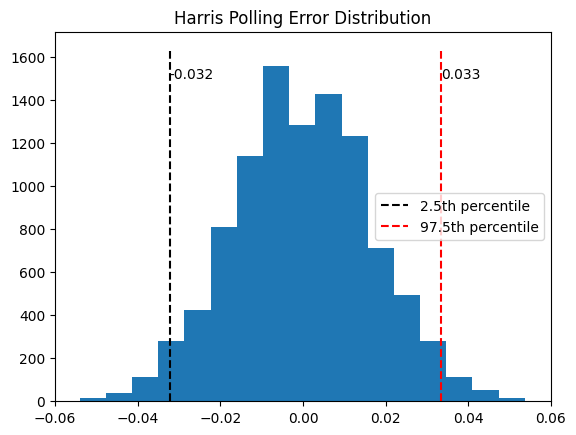

In [14]:
percentiles = {
    'trump': (trump_error_p2_5, trump_error_p97_5),
    'harris': (harris_error_p2_5, harris_error_p97_5),
}

candidates = ['trump', 'harris']

for candidate in candidates:
    plt.figure()
    plt.hist(results[f'{candidate}_error'], bins=20)
    plt.title(f"{candidate.capitalize()} Polling Error Distribution")

    # Get the current y-axis limits
    ymin, ymax = plt.ylim()

    p2_5, p97_5 = percentiles[candidate]

    # Add vertical lines at percentiles
    plt.vlines(p2_5, ymin, ymax, color='black', linestyle='--', label='2.5th percentile')
    plt.vlines(p97_5, ymin, ymax, color='red', linestyle='--', label='97.5th percentile')

    plt.xlim([-0.06,0.06])
 
    # Add text labels near the lines
    plt.text(p2_5, ymax*0.95, f'{p2_5:.3f}', rotation=0, verticalalignment='top')
    plt.text(p97_5, ymax*0.95, f'{p97_5:.3f}', rotation=0, verticalalignment='top')
    
    plt.legend()
    plt.show();

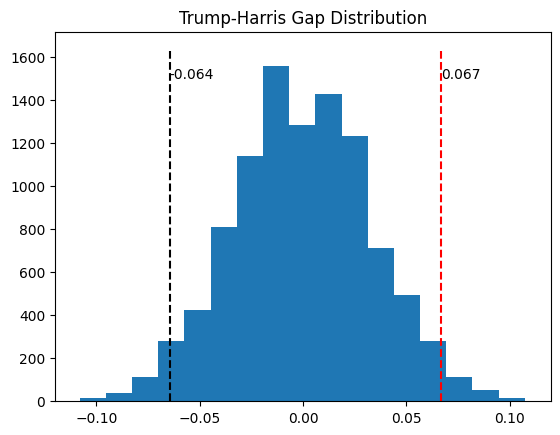

In [15]:
percentiles = {
    'trump_harris_gap': (trump_harris_gap_p2_5, trump_harris_gap_p97_5)
}

plt.figure()
plt.hist(results[f'trump_harris_gap'], bins=20)
plt.title("Trump-Harris Gap Distribution")

# Get the current y-axis limits
ymin, ymax = plt.ylim()

p2_5, p97_5 = percentiles['trump_harris_gap']

# Add vertical lines at percentiles
plt.vlines(p2_5, ymin, ymax, color='black', linestyle='--', label='2.5th percentile')
plt.vlines(p97_5, ymin, ymax, color='red', linestyle='--', label='97.5th percentile')

plt.xlim([-0.12,0.12])

# Add text labels near the lines
plt.text(p2_5, ymax*0.95, f'{p2_5:.3f}', rotation=0, verticalalignment='top')
plt.text(p97_5, ymax*0.95, f'{p97_5:.3f}', rotation=0, verticalalignment='top')

plt.show();

In [ ]:
np.random.seed(42)
gaps = list()

num_experiments = 10000
num_surveys = 229
survey_sample_size = 900
trump_true_p = 0.5 

for i in range(num_experiments):
    results=gen_survey_data(survey_sample_size, trump_true_p, num_surveys)
    gap_within_2_5 = (results['trump_harris_gap'] >= -0.025) & (results['trump_harris_gap'] <= 0.025) # 2.5 is the margin of error on both tails
    gaps.append(np.mean(gap_within_2_5))

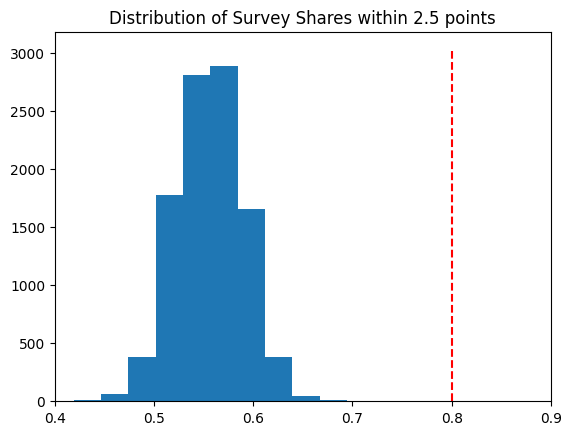

In [23]:
plt.hist(gaps, bins=10)
plt.title("Distribution of Survey Shares within 2.5 points")
plt.xlim([0.4,0.9])
ymin, ymax = plt.ylim()

plt.vlines(0.8, ymin, ymax, color='red', linestyle='--', label='80% of polls within 2.5 points')

plt.show()

In [24]:
# probability of getting 80% of surveys within 2.5 points 

t_stat = (0.80-np.mean(gaps))/np.std(gaps)
print("t score: ", t_stat)  
print("P(error of 2.5%: ", stats.norm.cdf(-1*t_stat))

t score:  7.318163036022451
P(error of 2.5%:  1.2569416792668907e-13
